<a href="https://colab.research.google.com/github/Sunday-Okey/Pandas_Lesson_Colab/blob/main/Filtering_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Filtering a DataFrame

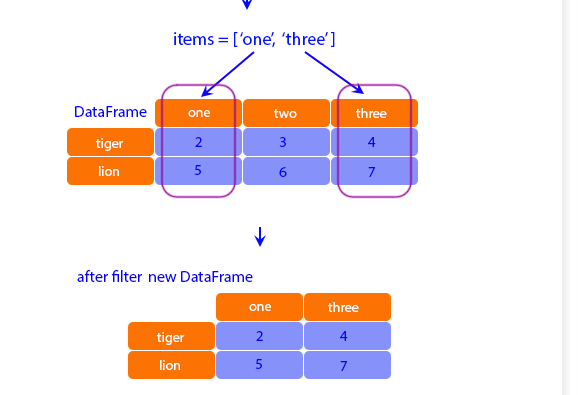

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
# Download the data
import urllib.request
datapath = os.path.join("data", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/paskhaver/pandas-in-action/master"
os.makedirs(datapath, exist_ok=True)
for filename in ("employees.csv", "netflix.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "/chapter_05_filtering_a_dataframe/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

The employees.csv data set is a fictional collection of workers at a company. Each record includes the employee’s first name, gender, start date at the firm, salary, manager status (True or False), and team. Let’s take a peek at the data set with the read_csv function:

In [ ]:
employees = pd.read_csv(datapath + 'employees.csv', parse_dates=['Start Date'])
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


In [ ]:
employees.dtypes

First Name            object
Gender                object
Start Date    datetime64[ns]
Salary               float64
Mgmt                  object
Team                  object
dtype: object

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


 Note that the library converts NaNs to True values.

In [ ]:
employees.Mgmt = employees.Mgmt.astype('bool')

In [ ]:
employees.tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales
1000,NaN,NaN,NaT,NaN,True,NaN


Except for the True in the last row of missing values, the DataFrame looks no different. But what about our memory use? Let’s invoke the info method again to see the difference:

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 40.2+ KB


Next, let’s transition to the Salary column. If we open the raw CSV file, we can see that its values are stored as whole numbers:

In employees, however, pandas stores the Salary values at floats. To support the NaNs throughout the column, pandas converts the integers to floating-point numbers—a technical requirement of the library that we observed in earlier chapters.

Following our previous Boolean example, we might try to coerce the column’s values to integers with the astype method. Unfortunately, pandas raises a ValueError exception:

Pandas is unable to convert the NaN values to integers. We can solve this problem by replacing the NaN values with a constant value. The fillna method replaces a Series’ null values with the argument we pass in. The next example provides a fill value of 0. Note that your choice of value can distort the data; 0 is passed solely for the sake of example.

In [ ]:
employees["Salary"].fillna(0).tail()

996      42392.0
997      96914.0
998      60500.0
999     129949.0
1000         0.0
Name: Salary, dtype: float64

Excellent. Now that the Salary column has no missing values, we can convert its values to integers with the astype method:

In [ ]:
employees.Salary.fillna(0).astype(int).tail()

996      42392
997      96914
998      60500
999     129949
1000         0
Name: Salary, dtype: int64

Next, we can overwrite the existing Salary Series in employees:

In [ ]:
employees['Salary'] = employees.Salary.fillna(0).astype(int)

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 40.2+ KB


In [ ]:
employees.Team.value_counts()

IT              106
Finance         102
Business Dev    101
Marketing        98
Product          95
Sales            94
Engineering      92
HR               91
Distribution     90
Legal            88
Name: Team, dtype: int64

We can make one additional optimization. Pandas includes a special data type called a category, which is ideal for a column consisting of a small number of unique values relative to its total size. Some everyday examples of data points with a limited number of values include gender, weekdays, blood types, planets, and income groups. Behind the scenes, pandas stores only one copy of each categorical value rather than storing duplicates across rows.

The nunique method can reveal the number of unique values in each DataFrame column. Note that it excludes missing values (NaN) from the count by default:

In [ ]:
employees.nunique()

First Name    200
Gender          2
Start Date    971
Salary        995
Mgmt            2
Team           10
dtype: int64

The Gender and Team columns stand out as good candidates to store categorical values. In 1,001 rows of data, Gender has only two unique values, and Team has only ten unique values.

Let’s use the astype method again. First, we’ll convert the Gender column’s values to categories by passing an argument of "category" to the method:

In [ ]:
employees["Gender"].astype("category")

0         Male
1         Male
2       Female
3          NaN
4         Male
         ...  
996       Male
997       Male
998       Male
999       Male
1000       NaN
Name: Gender, Length: 1001, dtype: category
Categories (2, object): ['Female', 'Male']

Pandas has identified two unique categories: "Female" and "Male". We’re good to overwrite our existing Gender column:

In [ ]:
employees["Gender"] = employees["Gender"].astype("category")

Let’s check in on the memory use by invoking the info method. Memory use has dropped significantly once again because pandas has to keep track of only two values instead of 1,001:

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 33.5+ KB


Let’s repeat the same process for the Team column, which has only ten unique values:

In [ ]:
employees.Team = employees.Team.astype('category')

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    category      
dtypes: bool(1), category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 27.0+ KB


With fewer than ten lines of code, we’ve reduced the DataFrame’s memory consumption by more than 40%. Imagine that impact on data sets with millions of rows

##Filtering by a single condition

Extracting a subset of data is perhaps the most common operation in data analysis. A subset is a portion of a larger data set that fits some kind of condition.

Suppose that we want to generate a list of all employees named "Maria". To accomplish this task, we need to filter our employees data set based on the values in the First Name column. The list of employees named Maria is a subset of all employees.

In [ ]:
employees.columns = employees.columns.str.lower().str.replace(' ', '_')

In [ ]:
employees.head(3)

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,False,Finance


In [ ]:
employees.query('first_name == "Maria"')

,first_name,gender,start_date,salary,mgmt,team
2,Maria,Female,NaT,130590,False,Finance
198,Maria,Female,1990-12-27,36067,True,Product
815,Maria,NaN,1986-01-18,106562,False,HR
844,Maria,NaN,1985-06-19,148857,False,Legal
936,Maria,Female,2003-03-14,96250,False,Business Dev
984,Maria,Female,2011-10-15,43455,False,Engineering


In [ ]:
# employees[employees.first_name == 'Maria']
# employees.loc[employees.first_name == 'Maria']

If the use of multiple square brackets is confusing, you can assign the Boolean Series to a descriptive variable and then pass the variable into the square brackets instead. The following code yields the same subset of rows as the preceding code:

In [ ]:
marias = employees["first_name"] == "Maria"
employees[marias]
 

,first_name,gender,start_date,salary,mgmt,team
2,Maria,Female,NaT,130590,False,Finance
198,Maria,Female,1990-12-27,36067,True,Product
815,Maria,NaN,1986-01-18,106562,False,HR
844,Maria,NaN,1985-06-19,148857,False,Legal
936,Maria,Female,2003-03-14,96250,False,Business Dev
984,Maria,Female,2011-10-15,43455,False,Engineering


Let’s try another example. What if we want to extract a subset of employees who are not on the Finance team? The protocol remains the same, but with a slight twist. We need to generate a Boolean Series that checks which of the Team column’s values are not equal to "Finance". Then we can use the Boolean Series to filter employees. Python’s inequality operator returns True if two values are not equal and False if they are equal:

In [ ]:
employees[employees['team'] != 'Finance']

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483,False,Distribution
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


What if we want to retrieve all the managers in the company? Managers have a value of True in the Mgmt column. 

In [ ]:
employees[employees['mgmt']]

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
6,Ruby,Female,1987-08-17,65476,True,Product
...,...,...,...,...,...,...
992,Anthony,Male,2011-10-16,112769,True,Finance
993,Tina,Female,1997-05-15,56450,True,Engineering
994,George,Male,2013-06-21,98874,True,Marketing
999,Albert,Male,2012-05-15,129949,True,Sales


We can also use arithmetic operands to filter columns based on mathematical conditions. The next example generates a Boolean Series for Salary values greater than $100,000

In [ ]:
employees[employees['salary'] > 100000]

,first_name,gender,start_date,salary,mgmt,team
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
9,Frances,Female,2002-08-08,139852,True,Business Dev
...,...,...,...,...,...,...
990,Robin,Female,1987-07-24,100765,True,IT
991,Rose,Female,2002-08-25,134505,True,Marketing
992,Anthony,Male,2011-10-16,112769,True,Finance
995,Henry,NaN,2014-11-23,132483,False,Distribution


In [ ]:
employees.head(2)

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN


In [ ]:
employees[employees.gender == 'Female']

,first_name,gender,start_date,salary,mgmt,team
2,Maria,Female,NaT,130590,False,Finance
6,Ruby,Female,1987-08-17,65476,True,Product
7,NaN,Female,2015-07-20,45906,True,Finance
8,Angela,Female,2005-11-22,95570,True,Engineering
9,Frances,Female,2002-08-08,139852,True,Business Dev
...,...,...,...,...,...,...
987,Gloria,Female,2014-12-08,136709,True,Finance
988,Alice,Female,2004-10-05,47638,False,HR
990,Robin,Female,1987-07-24,100765,True,IT
991,Rose,Female,2002-08-25,134505,True,Marketing


##Filtering by multiple conditions

Suppose that we want to find all female employees who work on the business development team. Now pandas must look for two conditions to select a row: a value of "Female" in the Gender column and a value of "Business Dev" in the Team column. The two criteria are independent, but both must be met.

In [ ]:
employees[(employees['gender'] == 'Female') & (employees['team'] == 'Business Dev') & (employees["mgmt"])]

,first_name,gender,start_date,salary,mgmt,team
9,Frances,Female,2002-08-08,139852,True,Business Dev
38,Stephanie,Female,1986-09-13,36844,True,Business Dev
66,Nancy,Female,2012-12-15,125250,True,Business Dev
92,Linda,Female,2000-05-25,119009,True,Business Dev
111,Bonnie,Female,1999-12-17,42153,True,Business Dev
114,Ashley,Female,2002-08-04,58698,True,Business Dev
134,Carolyn,Female,2011-04-09,109260,True,Business Dev
155,Marie,Female,2003-03-16,104058,True,Business Dev
182,Lillian,Female,1999-06-19,123940,True,Business Dev
203,Diana,Female,2013-01-04,103521,True,Business Dev


In summary, the & symbol selects rows that fit all conditions. Declare two or more Boolean Series and then use the ampersand to weave them together.

###The OR condition

Suppose that we want to identify all employees with a Salary below $40,000 or a Start Date after January 1, 2015.

In [ ]:
employees[(employees['salary'] < 40000) | (employees['start_date'] > '2015-01-01')].tail()

,first_name,gender,start_date,salary,mgmt,team
958,Gloria,Female,1987-10-24,39833,False,Engineering
964,Bruce,Male,1980-05-07,35802,True,Sales
967,Thomas,Male,2016-03-12,105681,False,Engineering
989,Justin,NaN,1991-02-10,38344,False,Legal
1000,NaN,NaN,NaT,0,True,NaN


##Inversion with ~

The tilde symbol (~) inverts the values in a Boolean Series. All True values become False, and all False values become True.

Inversion is helpful when we’d like to reverse a condition. Let’s say we want to identify employees with a Salary of less than $100,000.

In [ ]:
employees[~(employees.salary >= 100000)]

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
6,Ruby,Female,1987-08-17,65476,True,Product
7,NaN,Female,2015-07-20,45906,True,Finance
8,Angela,Female,2005-11-22,95570,True,Engineering
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874,True,Marketing
996,Phillip,Male,1984-01-31,42392,False,Finance
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev


Equality

employees["Team"] == "Marketing"

employees["Team"].eq("Marketing")

Inequality

employees["Team"] != "Marketing"

employees["Team"].ne("Marketing")

Less than

employees["Salary"] < 100000

employees["Salary"].lt(100000)

Less than or equal to

employees["Salary"] <= 100000

employees["Salary"].le(100000)

Greater than

employees["Salary"] > 100000

employees["Salary"].gt(100000)

Greater than or equal to

employees["Salary"] >= 100000

employees["Salary"].ge(100000)

The same rules apply regarding the use of & and | symbols for AND/OR logic.

##Filtering by condition

##The isin method

What if we want to isolate the employees who belong to either the Sales, Legal, or Marketing team? We could provide three separate Boolean Series inside the square brackets and add the | symbol to declare OR criteria:

In [ ]:
employees[(employees['team']).isin(['Sales', 'Legal', 'Marketing'])]

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
5,Dennis,Male,1987-04-18,115163,False,Legal
11,Julie,Female,1997-10-26,102508,True,Legal
13,Gary,Male,2008-01-27,109831,False,Sales
20,Lois,NaN,1995-04-22,64714,True,Legal
...,...,...,...,...,...,...
986,Donna,Female,1982-11-26,82871,False,Marketing
989,Justin,NaN,1991-02-10,38344,False,Legal
991,Rose,Female,2002-08-25,134505,True,Marketing
994,George,Male,2013-06-21,98874,True,Marketing


In [ ]:
all_star_teams = ["Sales", "Legal", "Marketing"]
on_all_star_teams = employees["team"].isin(all_star_teams)
employees[on_all_star_teams].head()

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
5,Dennis,Male,1987-04-18,115163,False,Legal
11,Julie,Female,1997-10-26,102508,True,Legal
13,Gary,Male,2008-01-27,109831,False,Sales
20,Lois,NaN,1995-04-22,64714,True,Legal


An optimal situation for using the isin method is when we do not know the comparison collection in advance, such as when it is generated dynamically.

##The between method

When working with numbers or dates, we often want to extract values that fall within a range. Suppose that we want to identify all employees with a salary between $80,000 and $90,000.

In [ ]:
employees[employees.salary.between(80000,90000, inclusive='both')]

,first_name,gender,start_date,salary,mgmt,team
19,Donna,Female,2010-07-22,81014,False,Product
31,Joyce,NaN,2005-02-20,88657,False,Product
35,Theresa,Female,2006-10-10,85182,False,Sales
45,Roger,Male,1980-04-17,88010,True,Sales
54,Sara,Female,2007-08-15,83677,False,Engineering
...,...,...,...,...,...,...
930,Nancy,Female,2001-09-10,85213,True,Marketing
956,Beverly,Female,1986-10-17,80838,False,Engineering
963,Ann,Female,1994-09-23,89443,True,Sales
985,Stephen,NaN,1983-07-10,85668,False,Legal


The between method also works on columns of other data types. To filter datetimes, we can pass strings for the start and end dates of our time range. The keyword parameters for the first and second arguments of the method are left and right. Here, we find all employees who started with the company in the 1980s:

In [ ]:
employees[employees.start_date.between('1980-01-01', '1990-01-01')]

,first_name,gender,start_date,salary,mgmt,team
5,Dennis,Male,1987-04-18,115163,False,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
10,Louise,Female,1980-08-12,63241,True,NaN
12,Brandon,Male,1980-12-01,112807,True,HR
17,Shawn,Male,1986-12-07,111737,False,Product
...,...,...,...,...,...,...
983,John,Male,1982-12-23,146907,False,Engineering
985,Stephen,NaN,1983-07-10,85668,False,Legal
986,Donna,Female,1982-11-26,82871,False,Marketing
990,Robin,Female,1987-07-24,100765,True,IT


We can also apply the between method to string columns. Let’s extract all employees whose first names starts with the letter "R". We’ll start with a capital "R" as our inclusive lower bound and go up to the noninclusive upper bound of "S":

In [ ]:
employees[employees.first_name.between('R', 'S')]

,first_name,gender,start_date,salary,mgmt,team
6,Ruby,Female,1987-08-17,65476,True,Product
36,Rachel,Female,2009-02-16,142032,False,Business Dev
45,Roger,Male,1980-04-17,88010,True,Sales
67,Rachel,Female,1999-08-16,51178,True,Finance
78,Robin,Female,1983-06-04,114797,True,Sales
...,...,...,...,...,...,...
973,Russell,Male,2013-05-10,137359,False,Business Dev
982,Rose,Female,1982-04-06,91411,True,HR
990,Robin,Female,1987-07-24,100765,True,IT
991,Rose,Female,2002-08-25,134505,True,Marketing


##The isnull and notnull methods

The employees data set includes plenty of missing values. We can see a few missing values in our first five rows:

In [ ]:
employees.head()

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT


Pandas marks missing text values and missing numeric values with a NaN (not a number) designation, and it marks missing datetime values with a NaT (not a time) designation. We can see an example in the Start Date column at index position 2.

We can use several pandas methods to isolate rows with either null or present values in a given column. The isnull method returns a Boolean Series in which True denotes that a row’s value is missing:

In [ ]:
employees[employees.start_date.isnull()]

,first_name,gender,start_date,salary,mgmt,team
2,Maria,Female,NaT,130590,False,Finance
1000,NaN,NaN,NaT,0,True,NaN


The notnull method returns the inverse Series, one in which True indicates that a row’s value is present. The following output communicates that indices 0, 2, 3, and 4 do not have missing values:

In [ ]:
employees[employees.first_name.notna()]

,first_name,gender,start_date,salary,mgmt,team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483,False,Distribution
996,Phillip,Male,1984-01-31,42392,False,Finance
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev


In [ ]:
employees["team"].notnull().head()

0     True
1    False
2     True
3     True
4     True
Name: team, dtype: bool

In [ ]:
~employees["team"].isnull().head()

0     True
1    False
2     True
3     True
4     True
Name: team, dtype: bool

Either approach works, but notnull is a bit more descriptive and thus is recommended.

As always, we can use these Boolean Series to extract specific DataFrame rows. Here, we extract all employees with a missing Team value:

In [ ]:
no_team = employees['team'].isnull()
employees[no_team].head()

,first_name,gender,start_date,salary,mgmt,team
1,Thomas,Male,1996-03-31,61933,True,NaN
10,Louise,Female,1980-08-12,63241,True,NaN
23,NaN,Male,2012-06-14,125792,True,NaN
32,NaN,Male,1998-08-21,122340,True,NaN
91,James,NaN,2005-01-26,128771,False,NaN


The next example pulls out employees with a present First Name value:

In [ ]:
has_name = employees['first_name'].notnull()
employees[has_name].tail()

,first_name,gender,start_date,salary,mgmt,team
995,Henry,NaN,2014-11-23,132483,False,Distribution
996,Phillip,Male,1984-01-31,42392,False,Finance
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


The isnull and notnull methods are the best way to quickly filter for present and missing values in one or more rows.



###Dealing with null values

Let’s kick off this section by bringing our data set back to its original shape. We’ll reimport the CSV by using the read_csv function:

In [ ]:
employees = pd.read_csv(datapath + "employees.csv", parse_dates = ["Start Date"])
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


The dropna method removes DataFrame rows that hold any NaN values. It doesn’t matter how many values a row is missing; the method excludes the row if a single NaN is present. The employees DataFrame has a missing value at index 0 of the Salary column, index 1 of the Team column, index 2 of the Start Date column, and index 3 of the Gender column. Notice that pandas excludes all these rows in the following output:

In [ ]:
employees.dropna()

,First Name,Gender,Start Date,Salary,Mgmt,Team
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


We can pass the how parameter an argument of "all" to remove rows in which all values are missing. Only one row in the data set, the last one, satisfies this condition:

In [ ]:
employees.dropna(how='all').tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


The how parameter’s default argument is "any". An argument of "any" removes a row if any of its values is absent. Notice that the row at index label 995 has NaN in the Gender column of the preceding output. Compare that output with the following output, in which row 995 is not present; pandas still removes the last row because it has at least one NaN value:

In [ ]:
employees.dropna(how = "any").tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


We can use the subset parameter to target rows with a missing value in a specific column. The next example removes rows that have a missing value in the Gender column:

In [ ]:
employees.dropna(subset=['Gender']).tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


We can also pass the subset parameter a list of columns. Pandas will remove a row if it has a missing value in any of the specified columns. The next example removes rows with missing values in the Start Date column, the Salary column, or both:

In [ ]:
employees.dropna(subset=['Start Date', 'Salary'])

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933.0,True,NaN
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


The thresh parameter specifies a minimum threshold of non-null values that a row must have for pandas to keep it. The next example filters employees for rows with at least four present values:

In [ ]:
employees.dropna(how = "any", thresh = 4).head()
 

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


The thresh parameter is great when a certain number of missing values renders a row useless for analysis.

##Dealing with duplicates

Missing values are a common occurrence in messy data sets, and so are duplicate values. Luckily, pandas includes several methods for identifying and excluding duplicate values.

The duplicated method

First up, here’s a quick reminder of the first five rows of the Team column. Notice that the value "Finance" appears at index positions 2 and 3:

In [ ]:
employees['Team']

0          Marketing
1                NaN
2            Finance
3            Finance
4                 IT
            ...     
996          Finance
997          Product
998     Business Dev
999            Sales
1000             NaN
Name: Team, Length: 1001, dtype: object

The duplicated method returns a Boolean Series that identifies duplicates in a column. Pandas returns True any time it sees a value that it previously encountered in the Series.

In [ ]:
employees.Team.duplicated()

0       False
1       False
2       False
3        True
4       False
        ...  
996      True
997      True
998      True
999      True
1000     True
Name: Team, Length: 1001, dtype: bool

The duplicated method’s keep parameter informs pandas which duplicate occurrence to keep. Its default argument, "first", keeps the first occurrence of each duplicate value. The following code is equivalent to the preceding code:

In [ ]:
employees["Team"].duplicated(keep = "first").head()

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

We can also ask pandas to mark the last occurrence of a value in a column as the nonduplicate. Pass a string of "last" to the keep parameter:

In [ ]:
employees.Team.duplicated(keep='last')

0        True
1        True
2        True
3        True
4        True
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Team, Length: 1001, dtype: bool

Let’s say we want to extract one employee from each team. One strategy we could use is pulling out the first row for each unique team in the Team column. Our existing duplicated method returns a Boolean Series; True identifies all duplicate values after the first encounter. If we invert that Series, we’ll get a Series in which True denotes the first time pandas encounters a value:

In [ ]:
~employees['Team'].duplicated()

0        True
1        True
2        True
3       False
4        True
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Team, Length: 1001, dtype: bool

In [ ]:
first_one_in_team = ~employees['Team'].duplicated()

In [ ]:
employees[first_one_in_team]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


This output tells us that Douglas is the first employee on the Marketing team in the data set, Thomas is the first one with a missing team, Maria is the first one on the Finance team, and so on.

##The drop_duplicates method

A DataFrame’s drop_duplicates method provides a convenient shortcut for accomplishing the operation in section 5.5.1. By default, the method removes rows in which all values are equal to those in a previously encountered row. There are no employees rows in which all six row values are equal, so the method doesn’t accomplish much for us with a standard invocation:

In [ ]:
employees.drop_duplicates()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


But we can pass the method a subset parameter with a list of columns that pandas should use to determine a row’s uniqueness. The next example finds the first occurrence of each unique value in the Team column. In other words, pandas keeps a row only if it has the first occurrence of a Team value (such as "Marketing"). It excludes all rows with duplicate Team values after the first one:

In [ ]:
employees.drop_duplicates(subset=['Team'])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


The drop_duplicates method also accepts a keep parameter. We can pass it an argument of "last" to keep the rows with each duplicate value’s last occurrence. These rows are likely to be closer to the end of the data set. In the following example, Alice is the last employee in the data set on the HR team, Justin is the last employee on the Legal team, and so on:

In [ ]:
employees.drop_duplicates(subset=['Team'], keep='last')

,First Name,Gender,Start Date,Salary,Mgmt,Team
988,Alice,Female,2004-10-05,47638.0,False,HR
989,Justin,NaN,1991-02-10,38344.0,False,Legal
990,Robin,Female,1987-07-24,100765.0,True,IT
993,Tina,Female,1997-05-15,56450.0,True,Engineering
994,George,Male,2013-06-21,98874.0,True,Marketing
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


One additional option is available for the keep parameter. We can pass an argument of False to exclude all rows with duplicate values. Pandas will reject a row if there are any other rows with the same value. The next example filters for rows in employees with a unique value in the First Name column. In other words, these first names occur only once in the DataFrame:

In [ ]:
employees.drop_duplicates(subset = ["First Name"], keep = False)

,First Name,Gender,Start Date,Salary,Mgmt,Team
5,Dennis,Male,1987-04-18,115163.0,False,Legal
8,Angela,Female,2005-11-22,95570.0,True,Engineering
33,Jean,Female,1993-12-18,119082.0,False,Business Dev
190,Carol,Female,1996-03-19,57783.0,False,Finance
291,Tammy,Female,1984-11-11,132839.0,True,IT
495,Eugene,Male,1984-05-24,81077.0,False,Sales
688,Brian,Male,2007-04-07,93901.0,True,Legal
832,Keith,Male,2003-02-12,120672.0,False,Legal
887,David,Male,2009-12-05,92242.0,False,Legal


We can pass a list of columns to the drop_duplicates method’s subset parameter. Pandas will use the columns to determine the presence of duplicates. The next example uses a combination of values across the Gender and Team columns to identify duplicates:

In [ ]:
employees.drop_duplicates(subset = ["Gender", "Team"]).head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


Let’s walk through the output. The row at index 0 holds the first occurrence of the name "Douglas" and the gender "Male" in the employees data set. Pandas will exclude any other rows with the same two values from the results set. To clarify, the library will still include a row if it has a First Name of "Douglas" and a Gender not equal to "Male". Similarly, it will include rows with Gender of "Male" and a First Name not equal to "Douglas". Pandas uses the combination of values across the two columns to identify the duplicates.

##Coding challenge

The netflix.csv data set is a collection of almost 6,000 titles that were available to watch in November 2019 on the video streaming service Netflix. It includes four columns: the video’s title, director, the date Netflix added it, and its type/category. The director and date_added columns contain missing values. We can see examples at index positions 0, 2, and 5836 of the following output:

Using the skills you learned in this chapter, solve the following challenges:

1. Optimize the data set for limited memory use and maximum utility.

2. Find all rows with a title of "Limitless".

3. Find all rows with a director of "Robert Rodriguez" and a type of "Movie".

4. Find all rows with either a date_added of "2019-07-31" or a director of "Robert Altman".

5. Find all rows with a director of "Orson Welles", "Aditya Kripalani", or "Sam Raimi".

6. Find all rows with a date_added value between May 1, 2019 and June 1, 2019.

7. Drop all rows with a NaN value in the director column.

8. Identify the days when Netflix added only one movie to its catalog.

In [ ]:
netflix = pd.read_csv(datapath + "netflix.csv", parse_dates=['date_added'])
netflix.head()

,title,director,date_added,type
0,Alias Grace,NaN,2017-11-03,TV Show
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
2,Lunatics,NaN,2019-04-19,TV Show
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie


In [ ]:
netflix.type = netflix.type.astype('category')

In [ ]:
netflix.type.head()

0    TV Show
1      Movie
2    TV Show
3      Movie
4      Movie
Name: type, dtype: category
Categories (2, object): ['Movie', 'TV Show']

2. Find all rows with a title of "Limitless".

In [ ]:
from tables.conditions import ne
netflix.loc[netflix.title == 'Limitless']

,title,director,date_added,type
1559,Limitless,Neil Burger,2019-05-16,Movie
2564,Limitless,NaN,2016-07-01,TV Show
4579,Limitless,Vrinda Samartha,2019-10-01,Movie


In [ ]:
netflix.query('title == "Limitless"')

,title,director,date_added,type
1559,Limitless,Neil Burger,2019-05-16,Movie
2564,Limitless,NaN,2016-07-01,TV Show
4579,Limitless,Vrinda Samartha,2019-10-01,Movie


3. Find all rows with a director of "Robert Rodriguez" and a type of "Movie".

In [ ]:
netflix.loc[(netflix.director == 'Robert Rodriguez') & (netflix.type =='Movie')]

,title,director,date_added,type
1384,Spy Kids: All the Time in the World,Robert Rodriguez,2019-02-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,2019-04-01,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,2019-03-08,Movie
2890,Sin City,Robert Rodriguez,2019-10-01,Movie
3836,Shorts,Robert Rodriguez,2019-07-01,Movie
3883,Spy Kids,Robert Rodriguez,2019-04-01,Movie


4. Find all rows with either a date_added of "2019-07-31" or a director of "Robert Altman".

In [ ]:
netflix.loc[(netflix.date_added == '2019-07-31') | (netflix.director == 'Robert Altman')]

,title,director,date_added,type
611,Popeye,Robert Altman,2019-11-24,Movie
1028,The Red Sea Diving Resort,Gideon Raff,2019-07-31,Movie
1092,Gosford Park,Robert Altman,2019-11-01,Movie
3473,Bangkok Love Stories: Innocence,NaN,2019-07-31,TV Show
5117,Ramen Shop,Eric Khoo,2019-07-31,Movie


Find all rows with a director of "Orson Welles", "Aditya Kripalani", or "Sam Raimi".

In [ ]:
netflix.loc[netflix.director.isin(['Orson Welles', 'Aditya Kripalani', 'Sam Raimi'])]

,title,director,date_added,type
946,The Stranger,Orson Welles,2018-07-19,Movie
1870,The Gift,Sam Raimi,2019-11-20,Movie
3706,Spider-Man 3,Sam Raimi,2019-11-01,Movie
4243,Tikli and Laxmi Bomb,Aditya Kripalani,2018-08-01,Movie
4475,The Other Side of the Wind,Orson Welles,2018-11-02,Movie
5115,Tottaa Pataaka Item Maal,Aditya Kripalani,2019-06-25,Movie


Find all rows with a date_added value between May 1, 2019 and June 1, 2019.

In [ ]:
netflix.loc[netflix.date_added.between('2019-05-01', '2019-06-01')]

,title,director,date_added,type
29,Chopsticks,Sachin Yardi,2019-05-31,Movie
60,Away From Home,NaN,2019-05-08,TV Show
82,III Smoking Barrels,Sanjib Dey,2019-06-01,Movie
108,Jailbirds,NaN,2019-05-10,TV Show
124,Pegasus,Han Han,2019-05-31,Movie
...,...,...,...,...
5671,Satan & Adam,V. Scott Balcerek,2019-06-01,Movie
5675,Rim of the World,McG,2019-05-24,Movie
5677,Malibu Rescue,Savage Steve Holland,2019-05-13,Movie
5739,Mission Istaanbul: Darr Ke Aagey Jeet Hai,Apoorva Lakhia,2019-05-16,Movie


Drop all rows with a NaN value in the director column.

In [ ]:
netflix.dropna(subset=['director'])

,title,director,date_added,type
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
5,Schubert In Love,Lars Büchel,2018-03-01,Movie
6,We Have Always Lived in the Castle,Stacie Passon,2019-09-14,Movie
...,...,...,...,...
5830,Bibi & Tina,Detlev Buck,2017-04-15,Movie
5832,The Pursuit,John Papola,2019-08-07,Movie
5833,Hurricane Bianca,Matt Kugelman,2017-01-01,Movie
5834,Amar's Hands,Khaled Youssef,2019-04-26,Movie


Identify the days when Netflix added only one movie to its catalog.

In [ ]:
netflix.head()

,title,director,date_added,type
0,Alias Grace,NaN,2017-11-03,TV Show
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
2,Lunatics,NaN,2019-04-19,TV Show
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie


In [ ]:
netflix.date_added.value_counts()

2019-11-01    94
2018-03-01    78
2018-10-01    72
2019-10-01    71
2019-07-01    60
              ..
2019-06-10     1
2017-05-09     1
2019-08-22     1
2018-03-28     1
2019-04-22     1
Name: date_added, Length: 1092, dtype: int64

In [ ]:
netflix.drop_duplicates(subset=['date_added'], keep=False)

,title,director,date_added,type
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
12,Without Gorky,Cosima Spender,2017-05-31,Movie
30,Anjelah Johnson: Not Fancy,Jay Karas,2015-10-02,Movie
38,One Last Thing,Tim Rouhana,2019-08-25,Movie
70,Marvel's Iron Man & Hulk: Heroes United,Leo Riley,2014-02-16,Movie
...,...,...,...,...
5748,Menorca,John Barnard,2017-08-27,Movie
5749,Green Room,Jeremy Saulnier,2018-11-12,Movie
5788,Chris Brown: Welcome to My Life,Andrew Sandler,2017-10-07,Movie
5789,A Very Murray Christmas,Sofia Coppola,2015-12-04,Movie
